In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [2]:
ratings = pd.read_csv("ml-100k/u.data",sep="\t",header=None,names= ['UseID', 'ItemID', 'rating', 'Timestamp' ])
ratings['date'] = pd.to_datetime(ratings['Timestamp'],unit='s')
ratings['year'] = ratings['date'].dt.year
ratings.head()

,UseID,ItemID,rating,Timestamp,date,year
0,196,242,3,881250949,1997-12-04 15:55:49,1997
1,186,302,3,891717742,1998-04-04 19:22:22,1998
2,22,377,1,878887116,1997-11-07 07:18:36,1997
3,244,51,2,880606923,1997-11-27 05:02:03,1997
4,166,346,1,886397596,1998-02-02 05:33:16,1998


In [3]:
ratings.isnull().sum()

UseID        0
ItemID       0
rating       0
Timestamp    0
date         0
year         0
dtype: int64

In [4]:
col_n = ['movie_id' , 'movie title' , 'release_date' , 'video_release_date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']
movies = pd.read_csv("ml-100k/u.item",sep="|",encoding='latin-1',header=None,names=col_n)
movies.head()

,movie_id,movie title,release_date,video_release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_year'] = movies['release_date'].dt.year
movies['release_year'] = movies['release_year'].fillna(0).astype(int)

In [6]:
#u_item.set_index("movie_id",inplace=True)
movies.shape

(1682, 25)

In [7]:
movies.head()

,movie_id,movie title,release_date,video_release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995


In [8]:
movies.isnull().sum()
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_id            1682 non-null   int64         
 1   movie title         1682 non-null   object        
 2   release_date        1681 non-null   datetime64[ns]
 3   video_release_date  0 non-null      float64       
 4   IMDb URL            1679 non-null   object        
 5   unknown             1682 non-null   int64         
 6   Action              1682 non-null   int64         
 7   Adventure           1682 non-null   int64         
 8   Animation           1682 non-null   int64         
 9   Children's          1682 non-null   int64         
 10  Comedy              1682 non-null   int64         
 11  Crime               1682 non-null   int64         
 12  Documentary         1682 non-null   int64         
 13  Drama               1682 non-null   int64       

In [9]:
movies[movies['unknown'] == 1]

,movie_id,movie title,release_date,video_release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
266,267,unknown,NaT,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1373,Good Morning (1971),1971-02-04,NaN,http://us.imdb.com/M/title-exact?Good%20Mornin...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1971


In [10]:
movies.drop(columns=["video_release_date","unknown"],axis=1,inplace=True) #Drop col because it has all null cols

In [11]:
movies.head()

,movie_id,movie title,release_date,IMDb URL,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,Toy Story (1995),1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye (1995),1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms (1995),1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty (1995),1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat (1995),1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


In [80]:
user = pd.read_csv("ml-100k/u.user",sep="|",header=None)
user.rename(columns={0:"user_id",1:"age",2:"gender",3:"occupation",4:"zip_code"},inplace=True)
#user.set_index("user_id",inplace=True)
user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [72]:
user.user_id.unique

<bound method Series.unique of 0        1
1        2
2        3
3        4
4        5
      ... 
938    939
939    940
940    941
941    942
942    943
Name: user_id, Length: 943, dtype: int64>

In [73]:
user.shape

(943, 5)

In [13]:
user.isnull().sum()

age           0
gender        0
occupation    0
zip_code      0
dtype: int64

# Univariate Plots

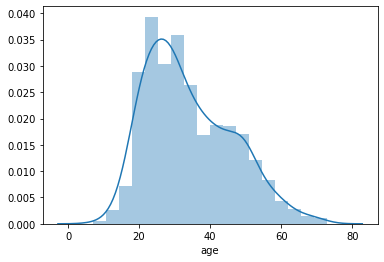

In [14]:
#user age
sns.distplot(user['age'])

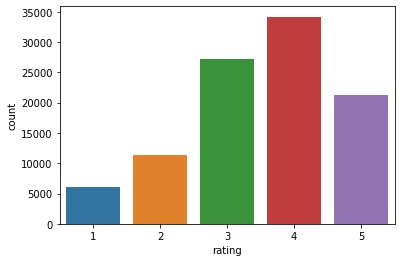

In [139]:
sns.countplot(ratings['rating']) #ratings

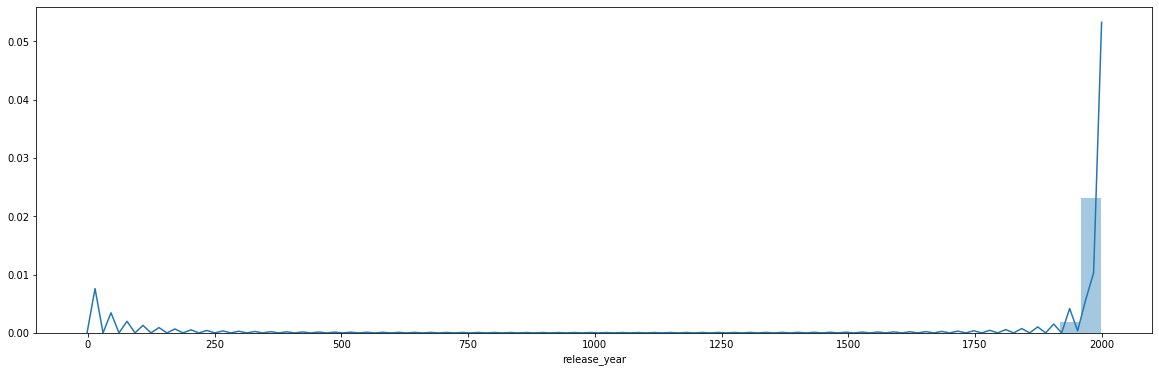

In [158]:
plt.figure(figsize=(20,6))    #increasing the figure size

sns.distplot(movies['release_year']) #ratingsx

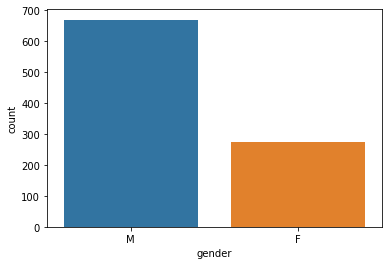

In [148]:
sns.countplot(user["gender"])

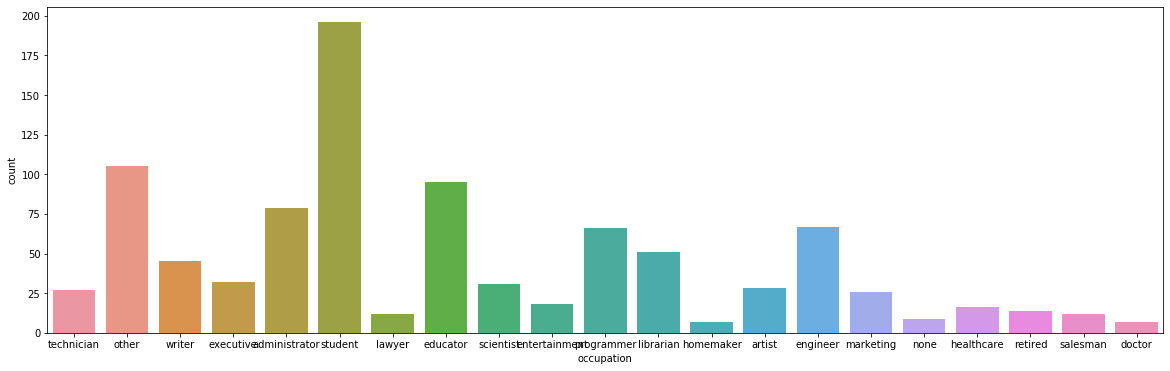

In [156]:
plt.figure(figsize=(20,6))    #increasing the figure size
sns.countplot(user["occupation"])


# Visualize how popularity of genres has changed over the years

In [16]:
genre_by_year = movies.groupby("release_year").sum()
genre_by_year = genre_by_year.drop(columns="movie_id").T
genre_by_year

release_year,0,1922,1926,1930,1931,1932,1933,1934,1935,1936,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,1,4,6,9,3,0
Children's,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,0,1,2,2,1,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,0,1,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,0,1,1,0,0,0,1,0,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1
Film-Noir,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,1,2,2


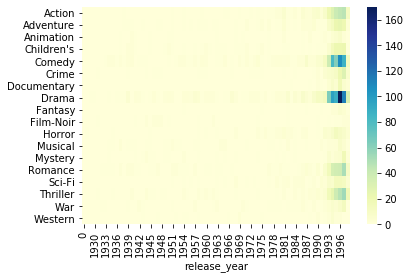

In [17]:
sns.heatmap(genre_by_year, cmap='YlGnBu')  #heat map to plot the above table

## Display top 25 movies by average rating

In [18]:
movies.head()

,movie_id,movie title,release_date,IMDb URL,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,Toy Story (1995),1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye (1995),1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms (1995),1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty (1995),1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat (1995),1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


In [19]:
ratings.head()

,UseID,ItemID,rating,Timestamp,date,year
0,196,242,3,881250949,1997-12-04 15:55:49,1997
1,186,302,3,891717742,1998-04-04 19:22:22,1998
2,22,377,1,878887116,1997-11-07 07:18:36,1997
3,244,51,2,880606923,1997-11-27 05:02:03,1997
4,166,346,1,886397596,1998-02-02 05:33:16,1998


In [20]:
ratings.shape

(100000, 6)

In [59]:
items = ratings.groupby('ItemID').count()

items = items[ratings.groupby('ItemID').count().UseID > 100].index

items = ratings.loc[ratings.ItemID.isin(items)]

items = items.groupby('ItemID').mean()

items = items.sort_values('rating',ascending = False)

order = items.index

print(order)
items

Int64Index([408, 318, 169, 483,  64, 603,  12,  50, 178, 134,
            ...
            264, 926, 259, 231,  29, 358, 260, 325, 243, 122],
           dtype='int64', name='ItemID', length=334)


,UseID,rating,Timestamp,year
ItemID,,,,
408,443.142857,4.491071,8.823304e+08,1997.392857
318,469.714765,4.466443,8.834050e+08,1997.439597
169,454.483051,4.466102,8.828888e+08,1997.423729
483,471.831276,4.456790,8.834745e+08,1997.436214
64,441.187279,4.445230,8.826119e+08,1997.385159
...,...,...,...,...
358,496.097902,2.615385,8.836746e+08,1997.503497
260,462.204724,2.574803,8.842682e+08,1997.519685
325,443.171875,2.546875,8.831109e+08,1997.421875


In [74]:
order = order[:25]
top_25_movies = movies.loc[movies["movie_id"].isin(order)]
top_25_movies['avg_rating'] =  items["rating"][0:25].values
top_25_movies[["movie_id","movie title","avg_rating"]]

/Users/jigar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,movie_id,movie title,avg_rating
11,12,"Usual Suspects, The (1995)",4.491071
49,50,Star Wars (1977),4.466443
63,64,"Shawshank Redemption, The (1994)",4.466102
97,98,"Silence of the Lambs, The (1991)",4.456790
126,127,"Godfather, The (1972)",4.445230
133,134,Citizen Kane (1941),4.387560
168,169,"Wrong Trousers, The (1993)",4.385768
171,172,"Empire Strikes Back, The (1980)",4.358491
173,174,Raiders of the Lost Ark (1981),4.344000
177,178,12 Angry Men (1957),4.292929


### Men watch more drama than womeno
### Men watch more Romance than womeno
### Women watch more Sci-Fi than men


In [88]:
user.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [99]:
ratings.columns

Index(['user_id', 'ItemID', 'rating', 'Timestamp', 'date', 'year'], dtype='object')

In [101]:
movies.columns

Index(['movie_id', 'movie title', 'release_date', 'IMDb URL', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'release_year'],
      dtype='object')

In [102]:
ratings.rename(columns={"UseID":"user_id","ItemID":"movie_id"},inplace=True)

In [103]:
ratings.columns

Index(['user_id', 'movie_id', 'rating', 'Timestamp', 'date', 'year'], dtype='object')

In [113]:
user_ratings = pd.merge(user,ratings,how="left",on="user_id")

user_ratings

,user_id,age,gender,occupation,zip_code,movie_id,rating,Timestamp,date,year
0,1,24,M,technician,85711,61,4,878542420,1997-11-03 07:33:40,1997
1,1,24,M,technician,85711,189,3,888732928,1998-03-01 06:15:28,1998
2,1,24,M,technician,85711,33,4,878542699,1997-11-03 07:38:19,1997
3,1,24,M,technician,85711,160,4,875072547,1997-09-24 03:42:27,1997
4,1,24,M,technician,85711,20,4,887431883,1998-02-14 04:51:23,1998
...,...,...,...,...,...,...,...,...,...,...
99995,943,22,M,student,77841,415,1,888640027,1998-02-28 04:27:07,1998
99996,943,22,M,student,77841,219,4,888639575,1998-02-28 04:19:35,1998
99997,943,22,M,student,77841,796,3,888640311,1998-02-28 04:31:51,1998
99998,943,22,M,student,77841,739,4,888639929,1998-02-28 04:25:29,1998


In [122]:
user_ratings_group = user_ratings.groupby(['user_id',"movie_id"]).count().gender
user_ratings_group

user_id  movie_id
1        1           1
         2           1
         3           1
         4           1
         5           1
                    ..
943      1067        1
         1074        1
         1188        1
         1228        1
         1330        1
Name: gender, Length: 100000, dtype: int64

In [135]:
user_ratings_movie = pd.merge(user_ratings,movies,how="inner",on="movie_id")
user_ratings_movie.groupby("gender").sum().loc[:,'Action':'Western']

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [133]:
user_ratings_movie.groupby("gender").sum().Romance

gender
F     5858
M    13603
Name: Romance, dtype: int64

In [134]:
user_ratings_movie.groupby("gender").sum()["Sci-Fi"]

gender
F     2629
M    10101
Name: Sci-Fi, dtype: int64